# Inferential Statistics

## Model Estimation

Model the population using the sample statistics

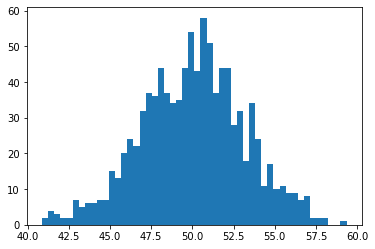

In [1]:
import matplotlib.pyplot as plt
import numpy as np

population = np.random.normal(50, 3, 10000)
sample = np.random.choice(population, 1000)
plt.hist(sample, bins=50)
plt.show()

In [2]:
def gaussian_model(x, mu, sigma):
    coeff_part = 1/(np.sqrt(2 * np.pi * sigma**2))
    exp_part = np.exp(-(x - mu)**2 / (2 * sigma**2))
    return coeff_part*exp_part

# sample statistics 
mean = np.mean(sample)
stdev = np.std(sample)

# estimate population parameters
population_model = gaussian_model(sample, mu=mean, sigma=stdev)

## Likelihood vs Probability

- Probability = P(data|model) -> given a model, what is the probability of producing a certain data point?
- Likelihood = P(model|data) -> given a data set, what is the probability that it is produced by a certain model?
- Given 2 models, we prefer the one with a higher likelihood

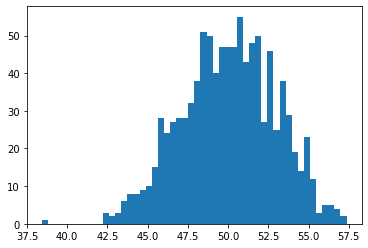

In [3]:
import matplotlib.pyplot as plt
import numpy as np

population = np.random.normal(50, 3, 10000)
sample = np.random.choice(population, 1000)
plt.hist(sample, bins=50)
plt.show()

def gaussian_model(x, mu, sigma):
    coeff_part = 1/(np.sqrt(2 * np.pi * sigma**2))
    exp_part = np.exp(-(x - mu)**2 / (2 * sigma**2))
    return coeff_part*exp_part

### 1. Calculating Likelihood

In [4]:
# Guess parameters
mu_guess = np.mean(sample)
sigma_guess = np.std(sample)

# Probability
probabilities = np.zeros(len(sample))
for n, val in enumerate(sample):
    probabilities[n] = gaussian_model(val, mu=mu_guess, sigma=sigma_guess)
    
# calculate likelihood
likelihood = np.product(probabilities)
loglikelihood = np.sum(np.log(probabilities)) # tends to be more useful

### 2. Finding Best Guess

We can plot the likelihoods of each model given a range of model parameters.

50.0432614604647


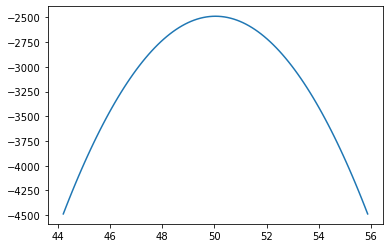

In [5]:
# Create an array of mu guesses
low_guess = np.mean(sample) - 2*np.std(sample)
high_guess = np.mean(sample) + 2*np.std(sample)
mu_guesses = np.linspace(low_guess, high_guess, 101)
sigma_guess = np.std(sample)

# Compute loglikelihood
loglikelihoods = np.zeros(len(mu_guesses))
for n, mu_guess in enumerate(mu_guesses):
    probabilities = np.zeros(len(sample))
    for i, val in enumerate(sample):
            probabilities[i] = gaussian_model(val, mu=mu_guess, sigma=sigma_guess)
    loglikelihoods[n] = np.sum(np.log(probabilities))

# find best guess
max_loglikelihood = np.max(loglikelihoods)
best_mu = mu_guesses[loglikelihoods == max_loglikelihood]
print(best_mu[0])

plt.plot(mu_guesses, loglikelihoods)
plt.show()

## Model Uncertainty and Sample Distributions

Previously, we assumed the shape of the distribution to form our model (gaussian). However, we often only have a sample and hence do not know the actual shape of the population distribution. However, we can use the sample as a model for the population (random sampling).  

From our sample, we can then estimate the values of the population statistics (e.g. mean, stdev). However, we will not know how uncertain our estimates are.

If we sample many times, we can get a distribution of sample statistics. We can use this to describe our confidence in our sample. This form of resampling is known as **bootstrap resampling**

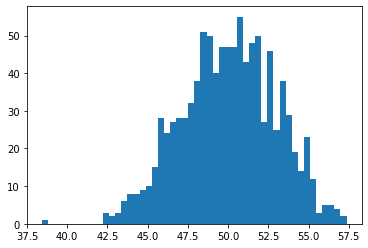

In [6]:
import matplotlib.pyplot as plt
import numpy as np

population = np.random.normal(50, 3, 10000)
population_model = np.random.choice(population, 2000, replace=True)
plt.hist(sample, bins=50)
plt.show()

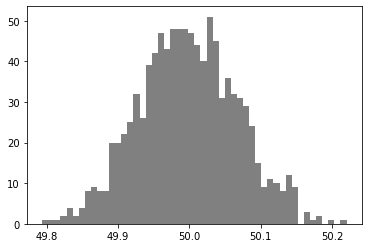

In [7]:
resample_size = 1000
bootstrap_means = np.zeros(resample_size)

for nr in range(resample_size):
    # replace=True means that after choosing a data point, it is replaced back into the set
    bootstrap_sample = np.random.choice(population_model, size=2000, replace=True) 
    bootstrap_means[nr] = np.mean(bootstrap_sample)
    
plt.hist(bootstrap_means, bins=50, color="gray")
plt.show()

Note that it is important to replace the data after every draw, else the population your next selection is from changes with each draw. Additionally, it eliminates repeat values, making a poor representatoin of the population.

## Model Errors and Randomness

### Types of Errors

- measurement error
- sampling bias
- random chance

### Null Hypothesis

The null hypothesis assumes the status quo, i.e. any significance in the statistic we are testing for is due to random chance.

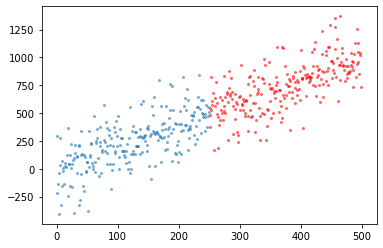

In [8]:
import numpy as np
import random

x_raw = []
y_raw = []
for n in range(0, 500):
    x_raw.append(n + random.random() * 2 - 1)
    y_raw.append(2 * n + random.random() * 1000 * (random.random() - 0.5))
    
x_raw = np.array(x_raw)
y_raw = np.array(y_raw)

x1 = x_raw[:250]
x2 = x_raw[250:]
y1 = y_raw[:250]
y2 = y_raw[250:]

plt.plot(x1, y1, linestyle=" ", marker="o", alpha=0.5, markersize=2)
plt.plot(x2, y2, linestyle=" ", marker="o", alpha=0.5, markersize=2, color="red")
plt.show()

In [9]:
y1_sample = np.random.choice(y1, 100, replace=True)
y2_sample = np.random.choice(y2, 100, replace=True)

diff = np.mean(y2_sample) - np.mean(y1_sample)
diff

488.74224120520887

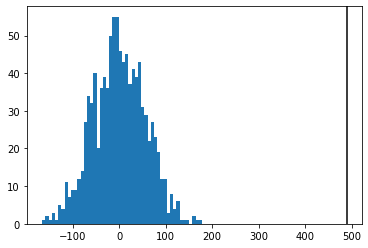

In [10]:
sample_diffs = np.zeros(1000)

for n in range(0, 1000):
    # shuffle
    shuffle_bucket = np.concatenate((y1, y2))
    np.random.shuffle(shuffle_bucket)

    # slice and compare
    shuffle1 = np.random.choice(shuffle_bucket[:250], 100, replace=True)
    shuffle2 = np.random.choice(shuffle_bucket[250:], 100, replace=True)

    # difference
    sample_diffs[n] = np.mean(shuffle2) - np.mean(shuffle1)

plt.hist(sample_diffs, bins=50)
plt.axvline(x=diff, ymin=70, ymax=0, label="diff = {}".format(diff), color="black")
plt.show()

As we can see, the probability of randomly getting a difference similar or more extreme to the one from our model is close to zero. This is known as the p-value.

Since the probability of the difference being due to random chance is low, we have a higher confidence in rejecting the null hypothesis